In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [3]:

weather2022=pd.read_csv('weather_data.csv')
weather2022.head(5)

,datetime,temp,dew,humidity,precip,precipprob,windspeed,winddir,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,icon
0,1/1/2018 0:00,22.0,19.0,83.16,0.000,0,3.6,40.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night
1,1/1/2018 1:00,21.9,19.4,86.13,2.989,100,3.6,79.0,78.6,8.6,0.0,NaN,0.0,"Rain, Partially cloudy",rain
2,1/1/2018 2:00,21.0,19.0,88.39,0.000,0,3.6,350.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night
3,1/1/2018 3:00,21.0,20.0,94.04,0.000,0,0.0,0.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night
4,1/1/2018 4:00,21.1,19.9,92.80,0.000,0,0.0,360.0,78.6,8.6,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night


In [4]:
weather2022.isnull().sum()

datetime              0
temp                  0
dew                   0
humidity              0
precip                0
precipprob            0
windspeed             0
winddir               0
cloudcover            0
visibility           83
solarradiation       26
solarenergy       20198
uvindex              26
conditions            0
icon                  0
dtype: int64

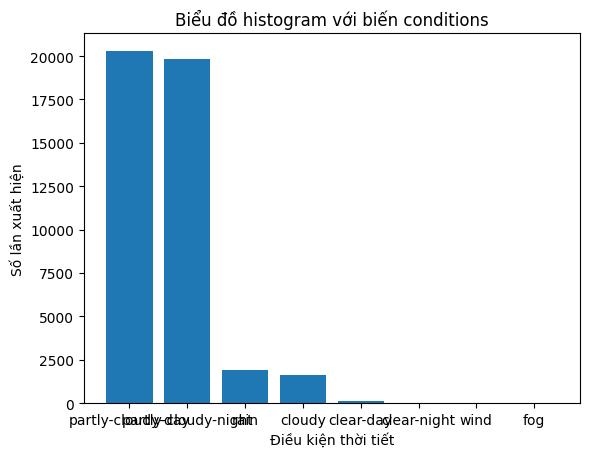

In [5]:
conditions_counts =weather2022['icon'].value_counts()

plt.bar(conditions_counts.index, conditions_counts.values)
plt.title('Biểu đồ histogram với biến conditions')

# Đặt tên cho trục x và y
plt.xlabel('Điều kiện thời tiết')
plt.ylabel('Số lần xuất hiện')

plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_23656\786216965.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather2022['cloudcover'].dropna())


<Axes: xlabel='cloudcover', ylabel='Density'>

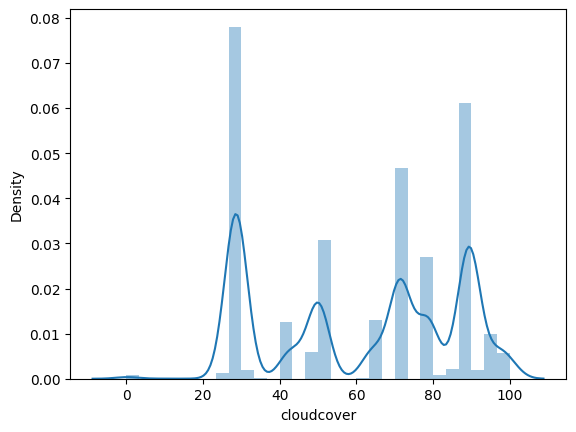

In [6]:
sns.distplot(weather2022['cloudcover'].dropna())


C:\Users\nguye\AppData\Local\Temp\ipykernel_23656\3934261243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather2022['precip'].dropna())


<Axes: xlabel='precip', ylabel='Density'>

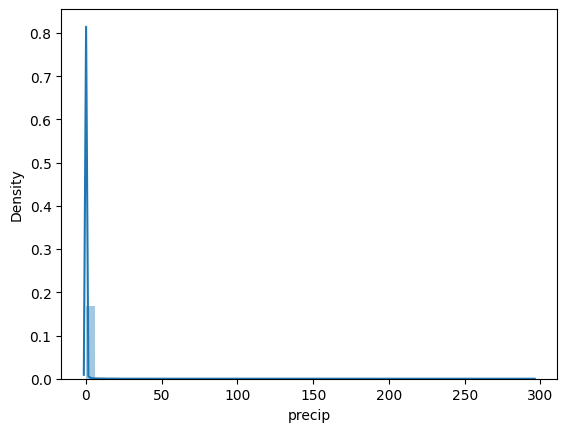

In [7]:
sns.distplot(weather2022['precip'].dropna())

In [8]:
# weather2022['datetime'] = pd.to_datetime(weather2022['datetime'])
# weather2022.set_index('datetime', inplace=True)

# # Step 3: Select data for August
# aug_data = weather2022.loc[weather2022.index.month == 11 ]


# # Step 4: Calculate hourly rainfall for August
# hourly_rainfall = []
# for i in range(24):
#     hourly_rainfall.append(aug_data.loc[aug_data.index.hour == i, 'precip'].sum())

# # Step 5: Create a bar chart of hourly rainfall for August
# plt.bar(range(24), hourly_rainfall)
# plt.title('Hourly Rainfall in August - Da Nang')
# plt.xlabel('Hour') 
# plt.ylabel('Rainfall (mm)')
# plt.show()

In [9]:
weather2022['datetime'] = pd.to_datetime(weather2022['datetime'])
weather2022 =weather2022.set_index(pd.DatetimeIndex(weather2022['datetime']))

In [10]:
# import scipy



# hour_rain_aug= weather2022.loc[weather2022.index.month == 11 ]#dataframe chua du lieu thoi tiet theo gio cua thang 8 voi index la datetime
# rain_series=pd.Series(hour_rain_aug['precip'])
# shape, loc, scale = scipy.stats.gamma.fit(rain_series)
# print(rain_series.max())
# x = np.linspace(0, rain_series.max(), 100)
# y = scipy.stats.gamma.pdf(x, shape, loc, scale)

# plt.plot(x, y, 'r-', label='Gamma PDF')
# plt.hist(rain_series, density=True, alpha=0.5, bins=100)
# plt.xlabel('Lượng mưa (mm/h)')
# plt.ylabel('Tần suất')
# plt.legend()
# plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_23656\1322434352.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather_corr=weather2022.corr()


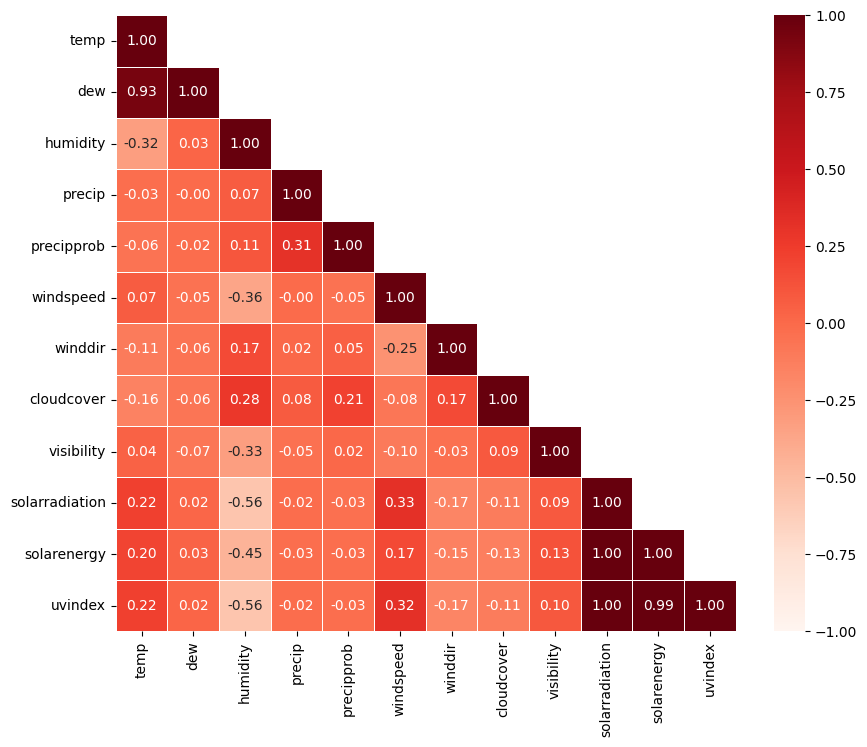

In [11]:
#su tương quan giua cac bien trong du lieu 
weather_corr=weather2022.corr()

one_corr=np.ones_like(weather_corr,dtype=bool)
#tạo một mảng  toàn số 1 mới có kích thước giống với weather_corr
mask=np.triu(one_corr,1)
## lấy phần tử trên và phía trên đường chéo chính và đặt các phần tử khác bằng 0

mask_new=mask[1:,1:-2]

fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data=weather_corr,mask=mask,annot=True,fmt=".2f",cmap="Reds",vmin=-1,vmax=1
            ,linecolor="white",linewidths=0.5,ax=ax)
plt.show()
#tạo ra biểu đồ nhiệt từ ma trận weather_corr và sử dụng mask để che dấu các phần tử nằm trên và phía trên đường chéo chính

In [12]:
weather2022['temp'].describe()

count    43824.000000
mean        28.055276
std          8.689011
min         13.000000
25%         24.100000
50%         27.000000
75%         30.000000
max         95.000000
Name: temp, dtype: float64

In [13]:

from sklearn.preprocessing import MinMaxScaler

def normalize_rainfall(x):
    x[x == 0] = np.nan
    x_norm = (x - np.nanmin(x)) / (np.nanmax(x) - np.nanmin(x))
    x_norm[np.isnan(x_norm)] = 0
    return x_norm

def remove_outliers(x, z_thresh):
    z_score = np.abs((x - np.nanmean(x)) / np.nanstd(x))
    x_filtered = x.copy()
    x_filtered[z_score > z_thresh] = np.nanmean(x)
    return x_filtered


count    43824.000000
mean         0.005169
std          0.052633
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: precip, dtype: float64


(array([4.3252e+04, 1.2300e+02, 6.0000e+00, 7.3000e+01, 7.3000e+01,
        2.1000e+01, 4.5000e+01, 1.0000e+01, 3.2000e+01, 3.5000e+01,
        5.0000e+00, 2.8000e+01, 4.0000e+00, 2.3000e+01, 1.8000e+01,
        6.0000e+00, 1.8000e+01, 1.0000e+00, 3.2000e+01, 1.9000e+01]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

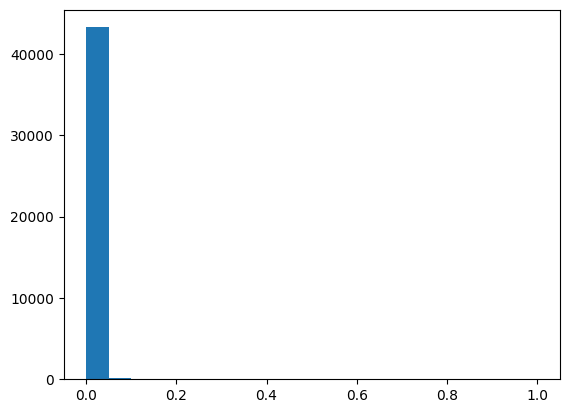

In [14]:

feature_use=weather2022.copy()
feature_precip=feature_use[['precip']]
feature_precip_outlier=remove_outliers(feature_precip,3)
feature_precip_normal=normalize_rainfall(feature_precip_outlier)
print(feature_precip_normal['precip'].describe())
plt.hist(feature_precip_normal,bins=20)

In [15]:

data=pd.DataFrame(weather2022,columns=['temp','dew','humidity','precip','windspeed','cloudcover','solarradiation'])
from sklearn.preprocessing import StandardScaler


def fit_transform(X):
    X_fit=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns,index=data.index)
    return X_fit

data_fit=fit_transform(data)
data_fit=remove_outliers(data_fit,3)

data_fit



,temp,dew,humidity,precip,windspeed,cloudcover,solarradiation
datetime,,,,,,,
2018-01-01 00:00:00,-0.696897,-0.584419,0.411485,-0.067162,-0.586670,0.694450,-0.722249
2018-01-01 01:00:00,-0.708406,-0.532814,0.645010,0.674077,-0.586670,0.694450,-0.722249
2018-01-01 02:00:00,-0.811986,-0.584419,0.822710,-0.067162,-0.586670,0.694450,-0.722249
2018-01-01 03:00:00,-0.811986,-0.455406,1.266958,-0.067162,-1.232522,0.694450,-0.722249
2018-01-01 04:00:00,-0.800477,-0.468307,1.169459,-0.067162,-1.232522,0.694450,-0.722249
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,-0.788968,-0.842444,-0.077581,-0.067162,0.740913,0.694450,-0.722249
2022-12-31 20:00:00,-0.811986,-0.971457,-0.374795,-0.067162,1.422645,-0.455081,-0.722249
2022-12-31 21:00:00,-0.811986,-0.971457,-0.374795,-0.067162,-0.263745,-0.455081,-0.722249


In [16]:
freq = 'H'
start_date = '2018-01-01 00:00:00'
end_date = '2022-12-31 23:00:00'
date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)#tạo chuỗi thời gian với tần suất hàng giờ

data_hourly = pd.DataFrame(index=date_rng, columns=['temp', 'dew', 'humidity', 'precip', 'windspeed', 'cloudcover', 'solarradiation'])
#tạo DataFrame mới với chỉ mục là chuỗi thời gian vừa tạo và các cột tương ứng với các đặc trưng

data_hourly.loc[data.index, 'temp'] = data['temp']
data_hourly.loc[data.index, 'dew'] = data['dew']
data_hourly.loc[data.index, 'humidity'] = data['humidity']
data_hourly.loc[data.index, 'precip'] = data['precip']
data_hourly.loc[data.index, 'windspeed'] = data['windspeed']
data_hourly.loc[data.index, 'cloudcover'] = data['cloudcover']
data_hourly.loc[data.index, 'solarradiation'] = data['solarradiation']


data_hourly = data_hourly.resample('H').mean().dropna()

Chia dữ liệu:

In [17]:

# data_chunks = np.array_split(data_hourly, len(data_hourly) // 24) 

data_hourly['precip'].max()


294.809

In [18]:
# from statsmodels.tsa.seasonal import STL
# stl_results = []

# for chunk in data_chunks:
#     stl = STL(chunk['precip'],seasonal=30*23+1)
#     res = stl.fit()
#     stl_results.append(res)
# stl_results

Tạo chuỗi thời gian cho dữ liệu

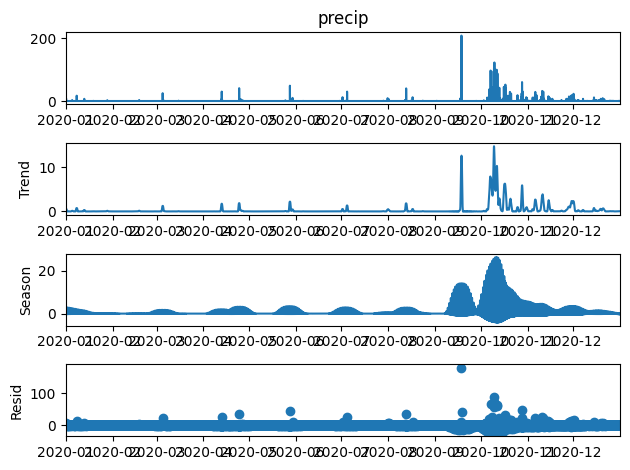

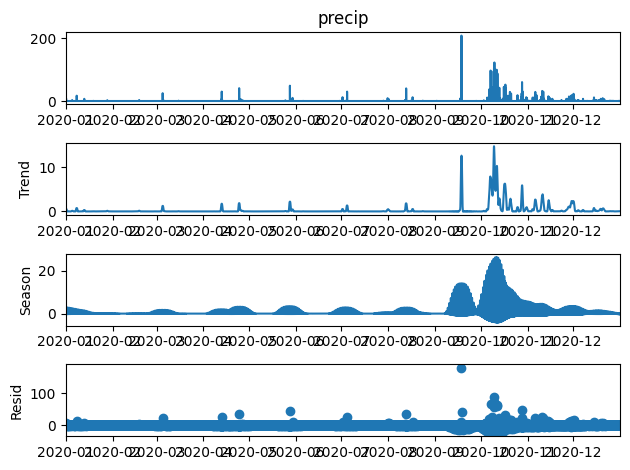

In [20]:
data_2020 = data_hourly.loc[(data_hourly.index.year == 2020) , ['precip']]

from statsmodels.tsa.seasonal import STL
stl = STL(data_2020['precip'], seasonal=25)
res = stl.fit()
res.plot()

In [ ]:

model=Sequential()
model.add(LSTM(n_nerous,activation='tanh',input_shape(n_steps_in,n_feature)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(n_nerous,activation='tanh',return_sequence=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam',loss='mse')
model.fit(X[:-1],y[:-1],epoch_n_epochs,verbose=1)
